# Project: Problem Statement - Credit Card Customer Segmentation

### AllLife Credit Card Customer Segmentation

##### Background: 
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

##### Objective: 
To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

##### Key Questions:

1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?

##### Data Description: 
Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call.

- Customer key - Identifier for the customer
- Average Credit Limit - Average credit limit across all the credit cards
- Total credit cards - Total number of credit cards
- Total visits bank - Total number of bank visits
- Total visits online - total number of online visits
- Total calls made - Total number of calls made by the customer

##### Steps to follow: 

1. Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)
2. Properly comment on the codes, provide explanations of the steps taken in the notebook and conclude your insights from the graphs. (5 marks)
3. Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)
4. Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)
5. Calculate average silhouette score for both methods. (5 marks)
6. Compare K-means clusters with Hierarchical clusters. (5 marks)
7. Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)

### Import Libraries and load the data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('Credit Card Customer Data.xlsx')

### Data Analysis

In [4]:
df.shape

(660, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [6]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [7]:
df.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [9]:
df.isna().any()

Sl_No                  False
Customer Key           False
Avg_Credit_Limit       False
Total_Credit_Cards     False
Total_visits_bank      False
Total_visits_online    False
Total_calls_made       False
dtype: bool

In [10]:
pd.value_counts(df['Sl_No'])

660    1
226    1
224    1
223    1
222    1
      ..
440    1
439    1
438    1
437    1
1      1
Name: Sl_No, Length: 660, dtype: int64

In [11]:
pd.value_counts(df['Customer Key'])

47437    2
37252    2
97935    2
96929    2
50706    2
        ..
66706    1
72339    1
69965    1
85645    1
71681    1
Name: Customer Key, Length: 655, dtype: int64

In [12]:
df['Sl_No'].duplicated().any()

False

In [13]:
df['Customer Key'].duplicated().any()

True

In [14]:
df['Customer Key'].duplicated().sum()

5

In [15]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
655    False
656    False
657    False
658    False
659    False
Length: 660, dtype: bool

##### Note
Since "Sl_No" is just a unique Index of each data and does not provide any value on this analysis, we will drop this column.

In [16]:
df.drop('Sl_No', axis=1, inplace=True)

In [17]:
df.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3


In [18]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
655    False
656    False
657    False
658    False
659    False
Length: 660, dtype: bool

In [19]:
df['Customer Key'].duplicated().sum()

5

In [20]:
df[df['Customer Key'].duplicated()==True]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
332,47437,17000,7,3,1,0
398,96929,67000,6,2,2,2
432,37252,59000,6,2,1,2
541,50706,60000,7,5,2,2
632,97935,187000,7,1,7,0


In [21]:
df[df['Customer Key']==47437]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,47437,100000,6,0,12,3
332,47437,17000,7,3,1,0


In [22]:
df[df['Customer Key']==96929]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
391,96929,13000,4,5,0,0
398,96929,67000,6,2,2,2


In [23]:
df[df['Customer Key']==37252]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,37252,6000,4,0,2,8
432,37252,59000,6,2,1,2


In [24]:
df[df['Customer Key']==50706]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
411,50706,44000,4,5,0,2
541,50706,60000,7,5,2,2


In [25]:
df[df['Customer Key']==97935]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
104,97935,17000,2,1,2,10
632,97935,187000,7,1,7,0


##### Note
Although there are duplicates in "Customer Key", the other columns of the data are not duplicated. There are no need to remove these data as duplicates.

##### Note
Since "Customer Key" is just an ID of each customer and does not provide any value on this analysis, we will drop this column.

In [26]:
df.drop('Customer Key', axis=1, inplace=True)

In [27]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


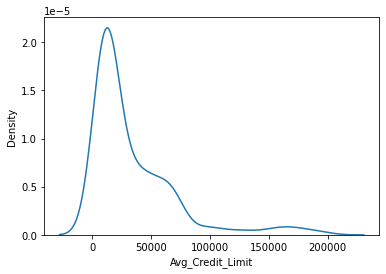

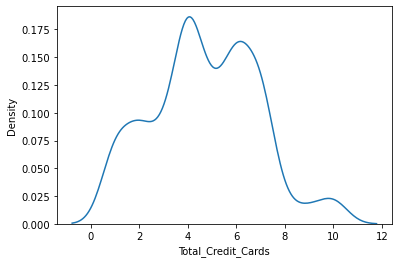

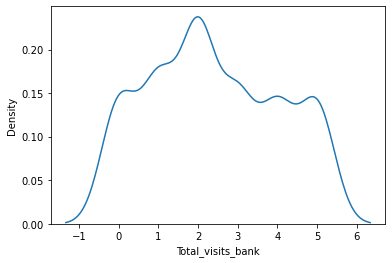

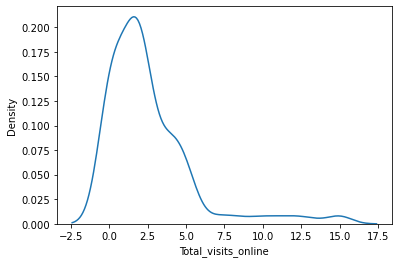

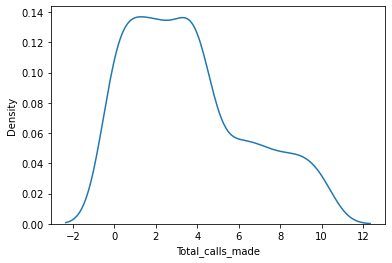

In [28]:
for i in df.columns[df.columns != 'class']:
    sns.distplot(df[i], hist=False,)
    plt.show()

##### Insights
Based on the graphs, it seems like there are around 3 ~ 6 clusters

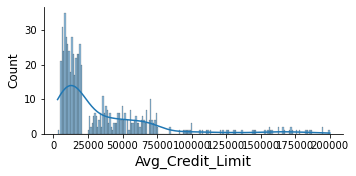

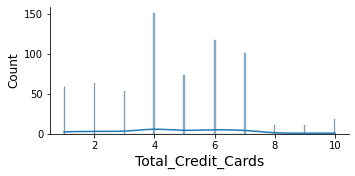

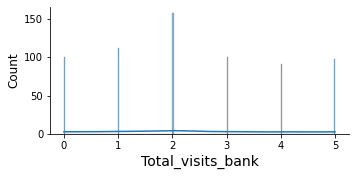

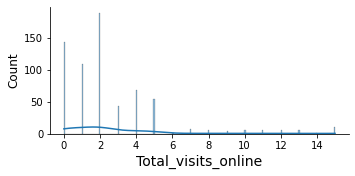

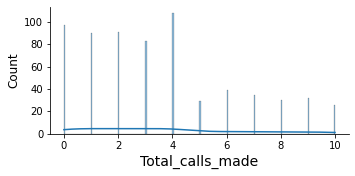

In [29]:
for col in df.columns:
    sns.displot(df[col], kde=True, height=2.5, aspect=2, bins=200)
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Count", fontsize=12)
    plt.show()

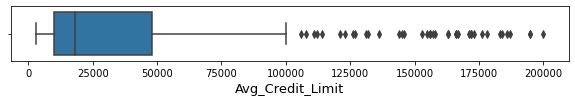

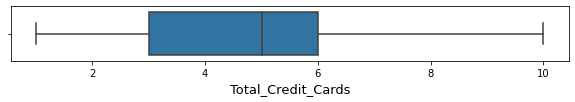

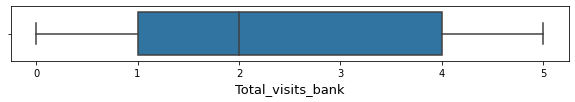

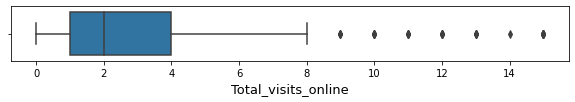

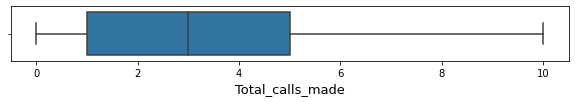

In [30]:
for col in df.columns:
    plt.figure(figsize=(10,1))
    sns.boxplot(x=col, data=df)
    plt.xlabel(col, fontsize=13)
    plt.show()
    print()

##### Insights
Avg_Credit_Limit and Total_visitor_online have many outliers.

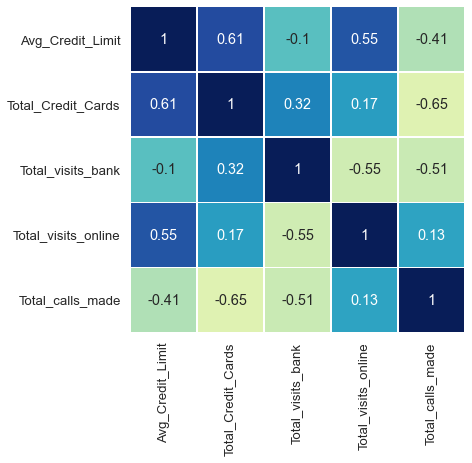

In [31]:
plt.figure(figsize=(6,6))
sns.set(font_scale=1.2)
sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

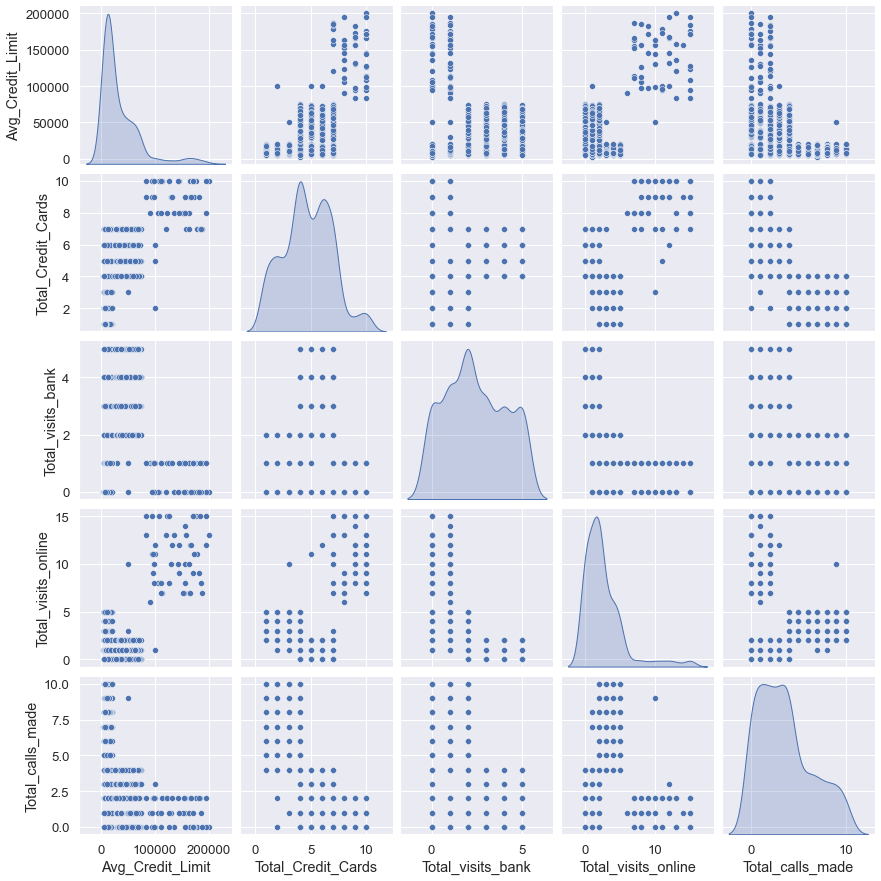

In [32]:
sns.pairplot(df, diag_kind='kde')

##### Insights
- Total_Credit_Cards and Avg_Credit_Limit have stronger positive correlation
- Total_visits_online and Avg_Credit_Limit have stronger positive correlation
- Total_Credit_Cards and Total_calls_made have stronger negative correlation
- Total_visits_bank and Total_visits_online have stronger negative correlation
- Total_visits_bank and Total_calls_made have stronger negative correlation

### Scale the data

In [33]:
from scipy.stats import zscore

In [34]:
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [35]:
scaled_df = df.apply(zscore)

In [36]:
scaled_df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


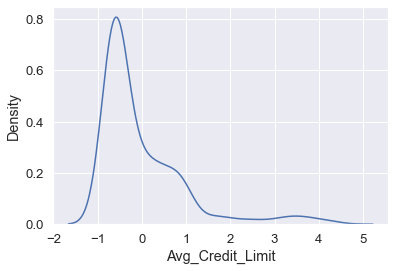

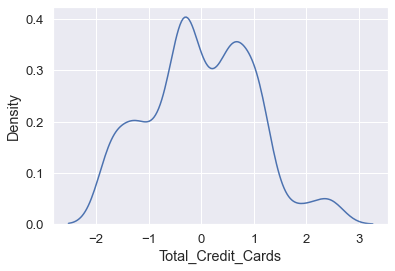

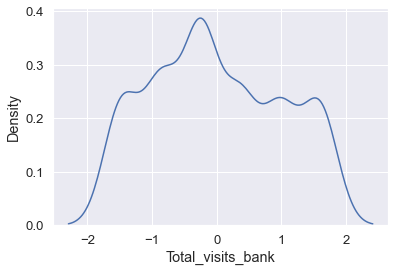

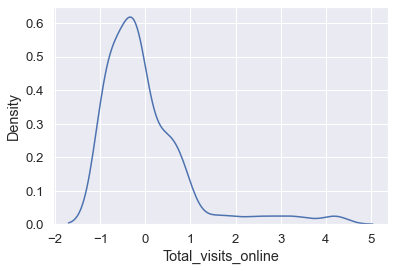

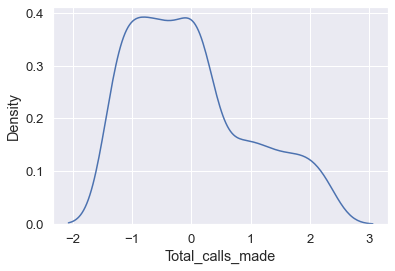

In [37]:
for i in scaled_df.columns[scaled_df.columns != 'class']:
    sns.distplot(scaled_df[i], hist=False,)
    plt.show()

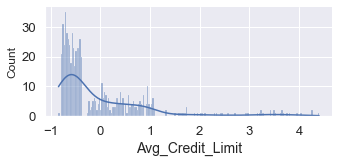

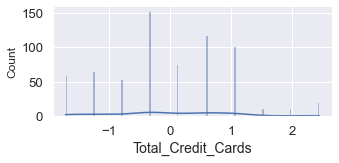

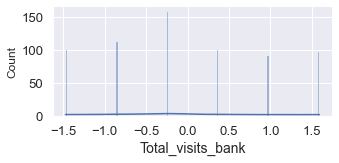

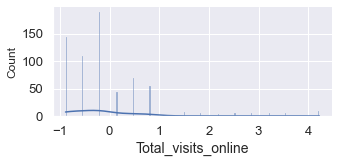

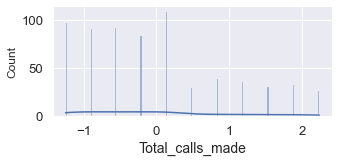

In [38]:
for col in scaled_df.columns:
    sns.displot(scaled_df[col], kde=True, height=2.5, aspect=2, bins=200)
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Count", fontsize=12)
    plt.show()

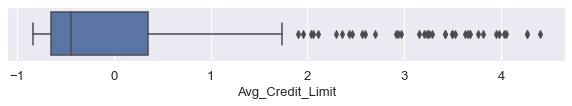

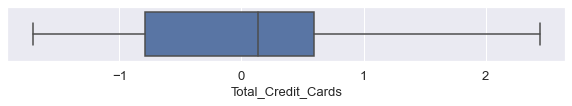

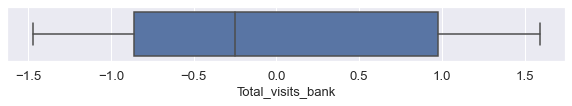

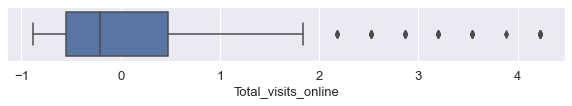

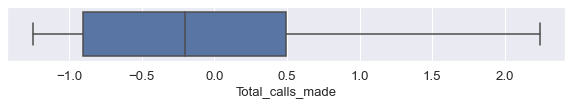

In [39]:
for col in scaled_df.columns:
    plt.figure(figsize=(10,1))
    sns.boxplot(x=col, data=scaled_df)
    plt.xlabel(col, fontsize=13)
    plt.show()
    print()

### K Means Clustering

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

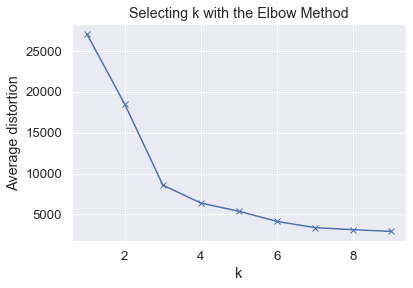

In [40]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df)
    prediction=model.predict(df)
    meanDistortions.append(sum(np.min(cdist(df, model.cluster_centers_, 'euclidean'), axis=1)) / df
                           .shape[0])

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

##### Insights
Based on the elbow method, k=3 seems to be the optimal number of clusters

In [41]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=1)

In [42]:
kmeans.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [43]:
centroids = kmeans.cluster_centers_

In [44]:
centroids

array([[-0.59579625, -1.05962278, -0.9015185 ,  0.32299678,  1.14810882],
       [-0.02106178,  0.37368962,  0.6663945 , -0.55367163, -0.55300488],
       [ 2.83176409,  1.86222621, -1.10576269,  2.82731942, -0.87432983]])

In [45]:
#Calculate the centroids for the columns to profile
centroid_df = pd.DataFrame(centroids, columns = list(scaled_df) )

In [46]:
centroid_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-0.595796,-1.059623,-0.901518,0.322997,1.148109
1,-0.021062,0.373690,0.666395,-0.553672,-0.553005
2,2.831764,1.862226,-1.105763,2.827319,-0.874330


In [47]:
## creating a new dataframe only for labels and converting it into categorical variable
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

df_labels['labels'] = df_labels['labels'].astype('category')

In [48]:
df_labels

,labels
0,1
1,0
2,1
3,1
4,2
...,...
655,2
656,2
657,2
658,2


In [49]:
# Joining the label dataframe with the data frame.
df_labeled = df.join(df_labels)

In [50]:
type(df_labeled)

pandas.core.frame.DataFrame

In [51]:
df_labeled.shape

(660, 6)

In [52]:
df_labeled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,100000,2,1,1,0,1
1,50000,3,0,10,9,0
2,50000,7,1,3,4,1
3,30000,5,1,1,4,1
4,100000,6,0,12,3,2


In [53]:
df.shape

(660, 5)

In [54]:
df_labeled.groupby(['labels'],axis=0)

In [55]:
df_analysis = (df_labeled.groupby(['labels'] , axis=0)).head(1000)  # the groupby creates a groupeddataframe that needs 
# to be converted back to dataframe. 
df_analysis

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,100000,2,1,1,0,1
1,50000,3,0,10,9,0
2,50000,7,1,3,4,1
3,30000,5,1,1,4,1
4,100000,6,0,12,3,2
...,...,...,...,...,...,...
655,99000,10,1,10,0,2
656,84000,10,1,13,2,2
657,145000,8,1,9,1,2
658,172000,10,1,15,0,2


In [56]:
df_labeled['labels'].value_counts()  

1    386
0    224
2     50
Name: labels, dtype: int64

Text(0.5, 0.92, '3D plot of KMeans Clustering')

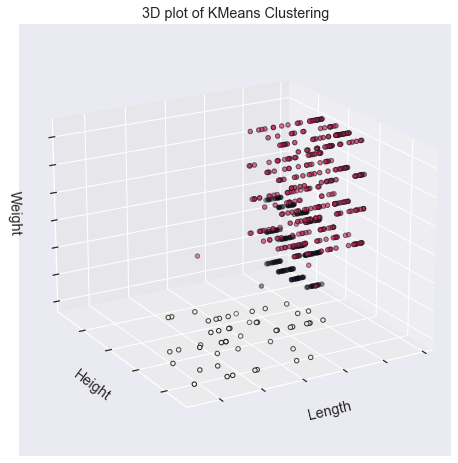

In [57]:
# 3D plots
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
k3_model=KMeans(3)
k3_model.fit(scaled_df)
labels = k3_model.labels_
ax.scatter(scaled_df.iloc[:, 0], scaled_df.iloc[:, 1], scaled_df.iloc[:, 2],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

array([[<AxesSubplot:title={'center':'Avg_Credit_Limit'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[labels]'>],
       [<AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[labels]'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

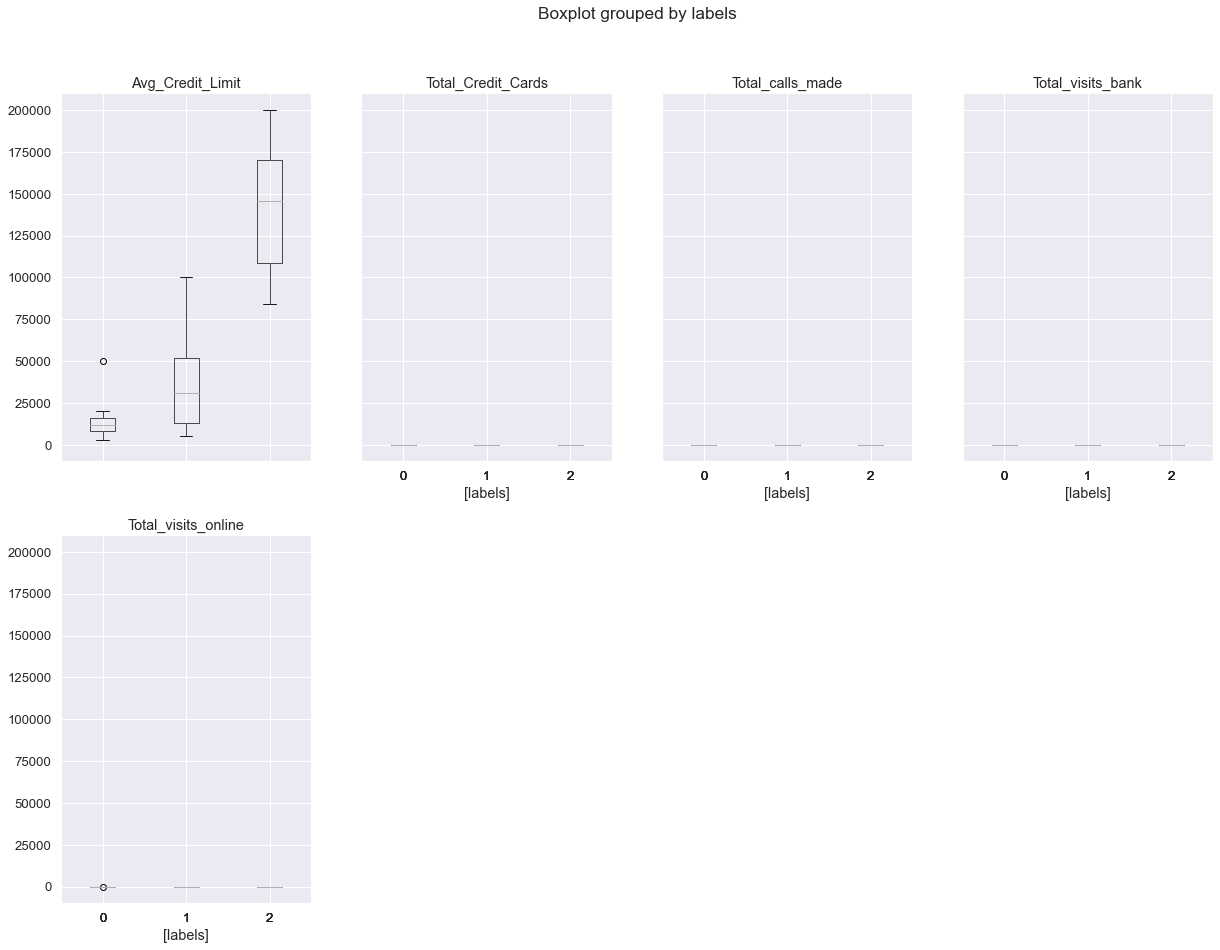

In [58]:
df_analysis.boxplot(by = 'labels',  layout=(2,4), figsize=(20, 15))

##### Note
As the scale for "Avg_Credit_Limit" and other variables have huge difference, we will visualize the box plot except "Avg_Credit_Limit" with different scale.

array([[<AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[labels]'>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

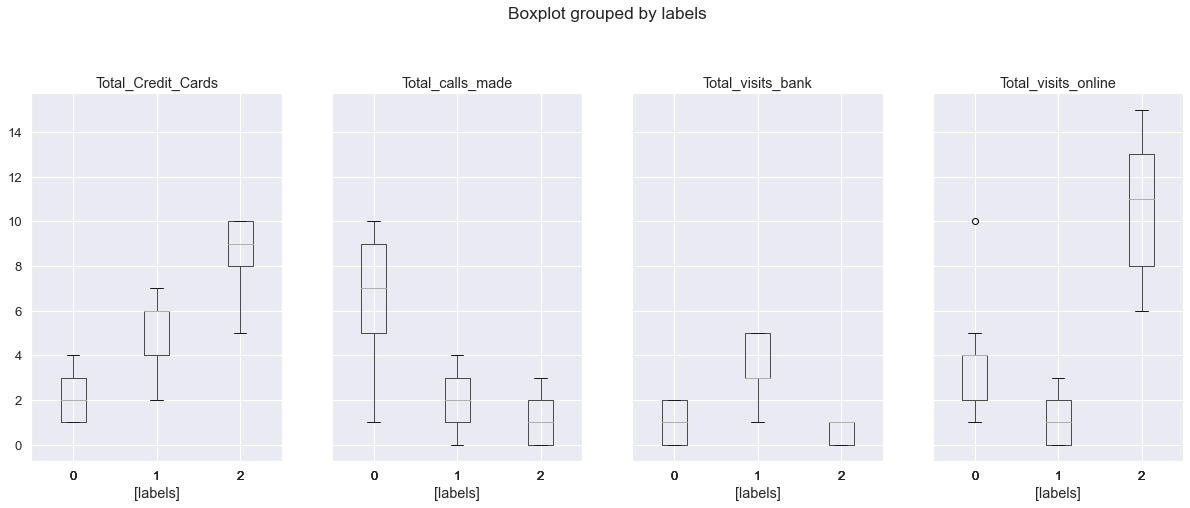

In [59]:
df_analysis.drop('Avg_Credit_Limit', axis=1).boxplot(by = 'labels',  layout=(2,4), figsize=(20, 15))

In [60]:
df_analysis.groupby('labels').mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536
1,33782.383420,5.515544,3.489637,0.981865,2.000000
2,141040.000000,8.740000,0.600000,10.900000,1.080000


#### Silhouette Score

In [61]:
from sklearn.metrics import silhouette_score

In [62]:
silhouette_score(scaled_df, df_labels)

0.5157182558881063

### Hierarchical Clustering (Ward)

In [63]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [64]:
linked_df = linkage(scaled_df, 'ward', metric='euclidean')
linked_df.shape

(659, 4)

In [65]:
linked_df

array([[ 464.        ,  497.        ,    0.        ,    2.        ],
       [ 425.        ,  455.        ,    0.        ,    2.        ],
       [ 250.        ,  361.        ,    0.        ,    2.        ],
       ...,
       [1313.        , 1314.        ,   16.84480374,  385.        ],
       [1311.        , 1316.        ,   47.06715339,  435.        ],
       [1315.        , 1317.        ,   50.16298666,  660.        ]])

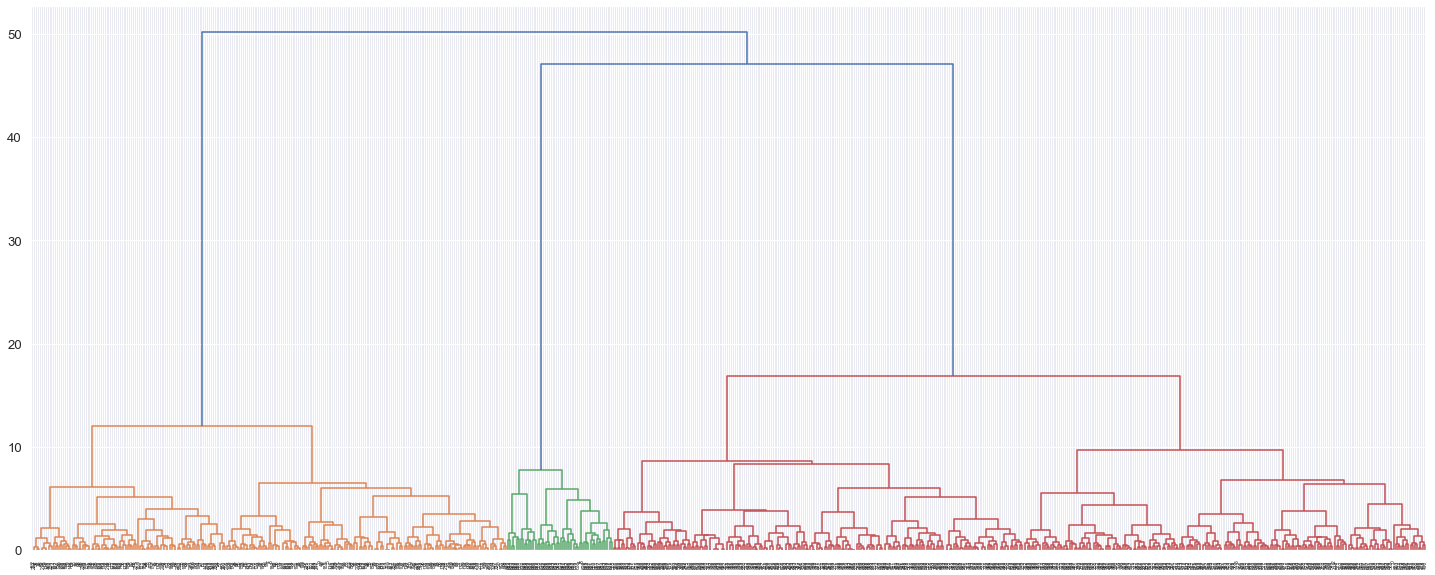

In [66]:
plt.figure(figsize=(25, 10))
dendrogram(linked_df)
plt.show()

##### Note
As there are huge difference in the distance with p=3 and p=4 or larger, it deemed that p=3 is optimal.

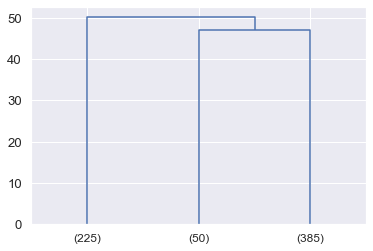

In [67]:
dendrogram(
    linked_df,
    truncate_mode='lastp',
    p=3,
)
plt.show()

##### Note
Based on the dendrogram, as the second cluster and the third cluster are splitted in somewhere between distance = 40 to 50, we determined that we can use 40 as the max distance (max_d).

In [68]:
max_d = 40

In [69]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(linked_df, max_d, criterion='distance')
clusters

array([3, 1, 3, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [70]:
df_hierarchical_labeled = df

In [71]:
df_hierarchical_labeled['labels'] = clusters

In [72]:
df_hierarchical_labeled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,100000,2,1,1,0,3
1,50000,3,0,10,9,1
2,50000,7,1,3,4,3
3,30000,5,1,1,4,3
4,100000,6,0,12,3,2


In [73]:
df_hierarchical_analysis = (df_hierarchical_labeled.groupby(['labels'] , axis=0)).head(1000)  # the groupby creates a groupeddataframe that needs 
# to be converted back to dataframe. 
df_hierarchical_analysis

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,100000,2,1,1,0,3
1,50000,3,0,10,9,1
2,50000,7,1,3,4,3
3,30000,5,1,1,4,3
4,100000,6,0,12,3,2
...,...,...,...,...,...,...
655,99000,10,1,10,0,2
656,84000,10,1,13,2,2
657,145000,8,1,9,1,2
658,172000,10,1,15,0,2


array([[<AxesSubplot:title={'center':'Avg_Credit_Limit'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[labels]'>],
       [<AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[labels]'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

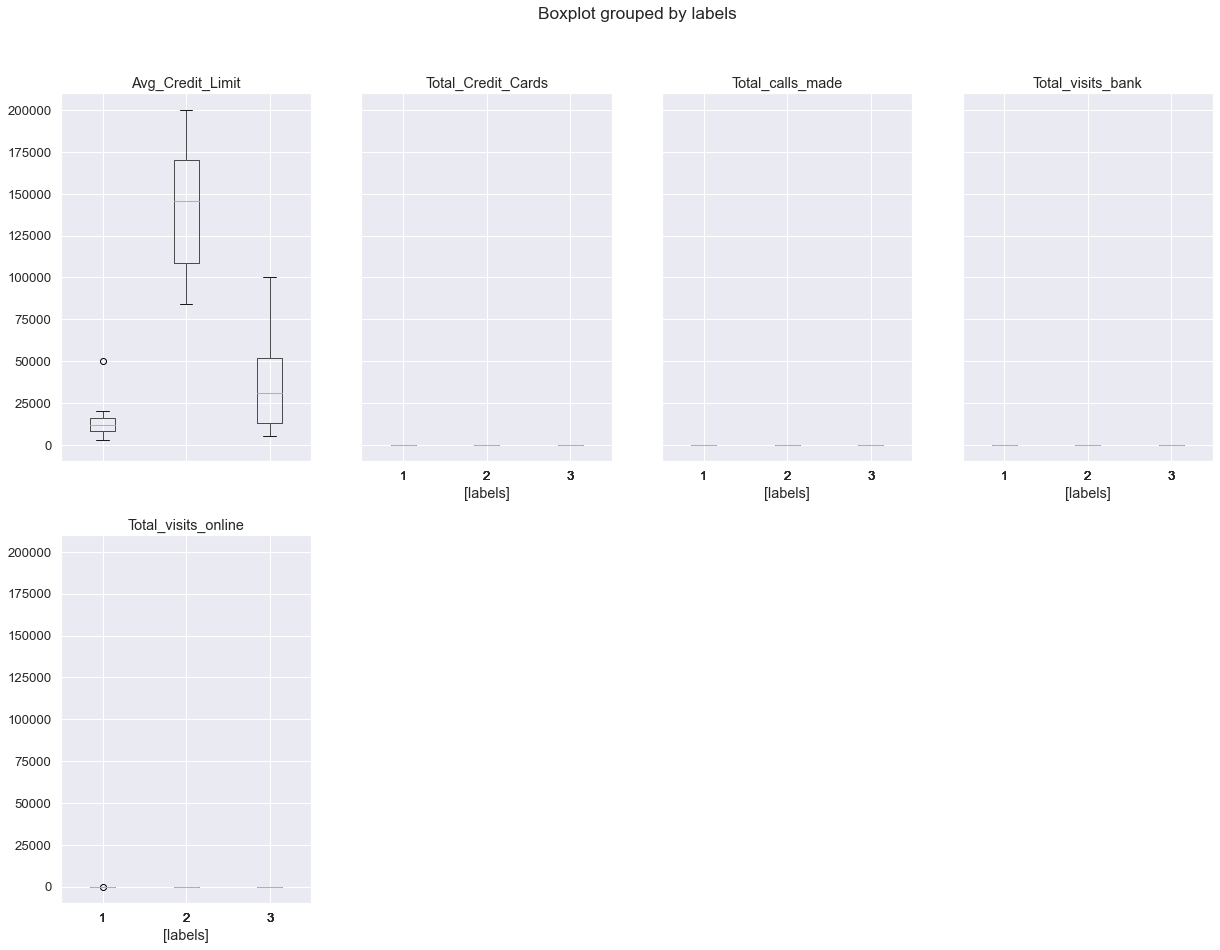

In [74]:
df_hierarchical_analysis.boxplot(by = 'labels',  layout=(2,4), figsize=(20, 15))

array([[<AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[labels]'>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

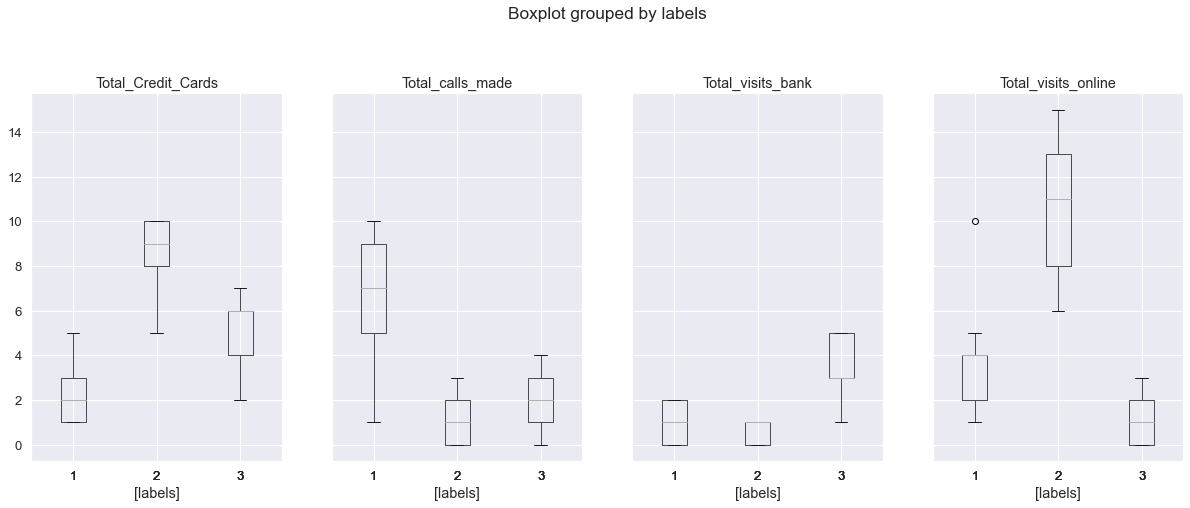

In [75]:
df_hierarchical_analysis.drop('Avg_Credit_Limit', axis=1).boxplot(by = 'labels',  layout=(2,4), figsize=(20, 15))

In [76]:
df_hierarchical_analysis['labels'].value_counts()  

3    385
1    225
2     50
Name: labels, dtype: int64

In [77]:
df_hierarchical_analysis.groupby('labels').mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
1,12151.111111,2.422222,0.937778,3.546667,6.857778
2,141040.000000,8.740000,0.600000,10.900000,1.080000
3,33851.948052,5.516883,3.493506,0.979221,1.994805


#### Cophenetic Coeff

In [78]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [79]:
# Calculate Cophenetic Coefficient
copheneticCoeff, coph_dists = cophenet(linked_df, pdist(scaled_df))

copheneticCoeff
# Higher value the better, It is used to compare dendograms

0.7415156284827493

#### Silhouette Score

In [80]:
silhouette_score(scaled_df, clusters)

0.5147639589977819

### Hierarchical Clustering (Average)

In [81]:
linked_df_avg = linkage(scaled_df, 'average', metric='euclidean')
linked_df_avg.shape

(659, 4)

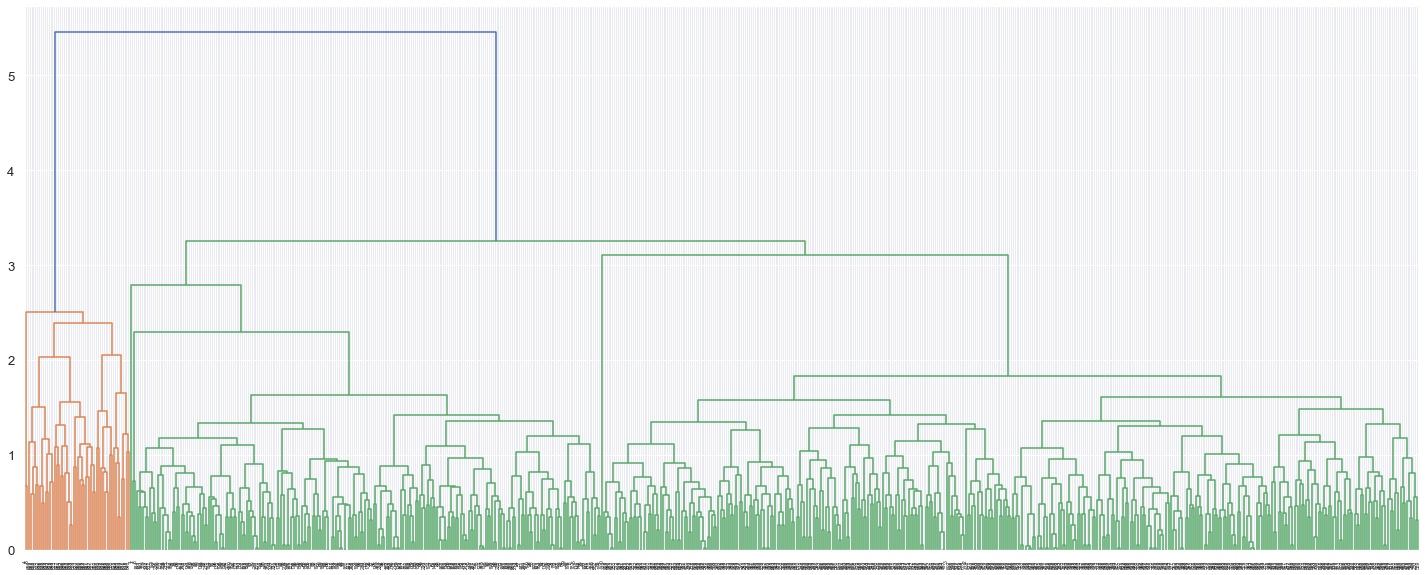

In [82]:
plt.figure(figsize=(25, 10))
dendrogram(linked_df_avg)
plt.show()

##### Note
As there are some difference in the distance with p=5 and p=6 or larger, we'll try p=5.

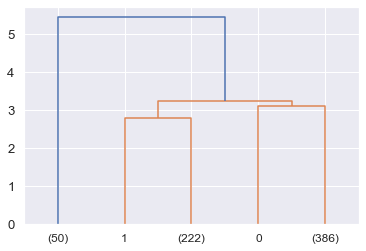

In [83]:
dendrogram(
    linked_df_avg,
    truncate_mode='lastp',
    p=5,
)
plt.show()

##### Note
The number of items in the cluster 2 and 4 are very small. It deemed better to combine these with other clusters. We'll try p=3.

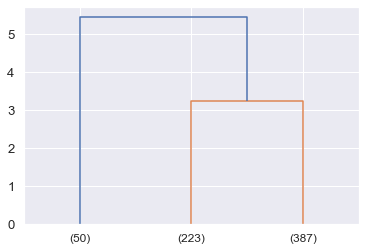

In [84]:
dendrogram(
    linked_df_avg,
    truncate_mode='lastp',
    p=3,
)
plt.show()

Note

Based on the dendrogram, as the second cluster and the third cluster are splitted in somewhere between distance = 3 to 4, we determined that we can use 3.2 as the max distance (max_d).

In [85]:
max_d = 3.2

In [86]:
clusters_avg = fcluster(linked_df_avg, max_d, criterion='distance')
clusters_avg

array([3, 2, 3, 3, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [87]:
df_hierarchical_labeled_avg = df

In [88]:
df_hierarchical_labeled_avg['labels'] = clusters

In [89]:
df_hierarchical_labeled_avg.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,100000,2,1,1,0,3
1,50000,3,0,10,9,1
2,50000,7,1,3,4,3
3,30000,5,1,1,4,3
4,100000,6,0,12,3,2


In [90]:
df_hierarchical_analysis_avg = (df_hierarchical_labeled_avg.groupby(['labels'] , axis=0)).head(1000)  # the groupby creates a groupeddataframe that needs 
# to be converted back to dataframe. 
df_hierarchical_analysis_avg

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,100000,2,1,1,0,3
1,50000,3,0,10,9,1
2,50000,7,1,3,4,3
3,30000,5,1,1,4,3
4,100000,6,0,12,3,2
...,...,...,...,...,...,...
655,99000,10,1,10,0,2
656,84000,10,1,13,2,2
657,145000,8,1,9,1,2
658,172000,10,1,15,0,2


array([[<AxesSubplot:title={'center':'Avg_Credit_Limit'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[labels]'>],
       [<AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[labels]'>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

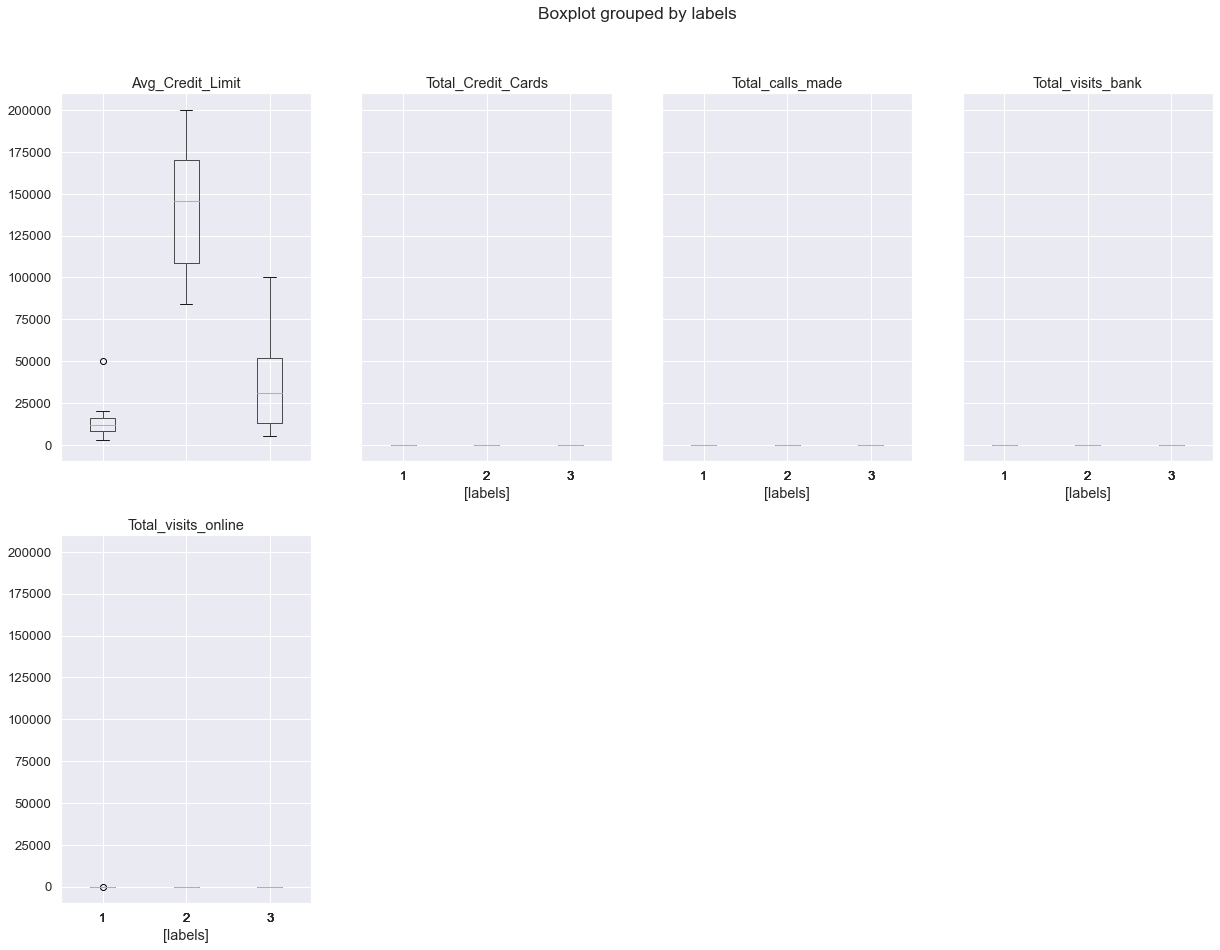

In [91]:
df_hierarchical_analysis_avg.boxplot(by = 'labels',  layout=(2,4), figsize=(20, 15))

array([[<AxesSubplot:title={'center':'Total_Credit_Cards'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'Total_calls_made'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'Total_visits_bank'}, xlabel='[labels]'>,
        <AxesSubplot:title={'center':'Total_visits_online'}, xlabel='[labels]'>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

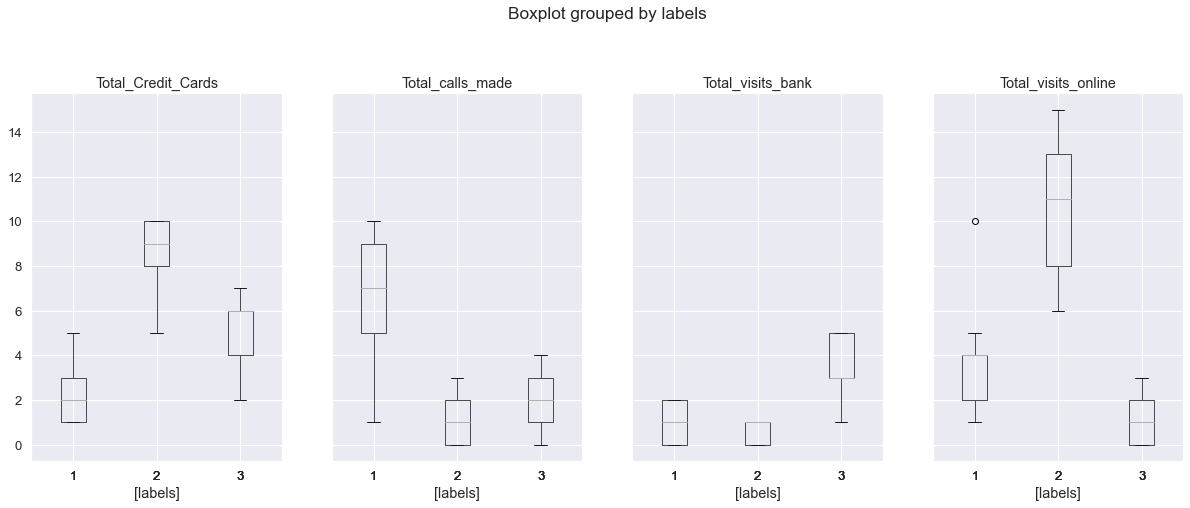

In [92]:
df_hierarchical_analysis_avg.drop('Avg_Credit_Limit', axis=1).boxplot(by = 'labels',  layout=(2,4), figsize=(20, 15))

In [93]:
df_hierarchical_analysis_avg.groupby('labels').mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
1,12151.111111,2.422222,0.937778,3.546667,6.857778
2,141040.000000,8.740000,0.600000,10.900000,1.080000
3,33851.948052,5.516883,3.493506,0.979221,1.994805


#### Cophenetic Coeff

In [94]:
# Calculate Cophenetic Coefficient
copheneticCoeff_avg, coph_dists = cophenet(linked_df_avg, pdist(scaled_df))

copheneticCoeff_avg
# Higher value the better, It is used to compare dendograms

0.8977080867389372

#### Insights
Since the linkage with average method has higher cophenetic coefficient that ward method, average method will be better.

#### Sihouette Score

In [95]:
silhouette_score(scaled_df, clusters_avg)

0.515922432650965

### Comparison between K Means Clustering, Hierarchical Clustering (Ward) and Hierarchical Clustering (Average)

##### K Means Clustering

In [96]:
silhouette_score(scaled_df, df_labels)

0.5157182558881063

##### Hierarchical Clustering (Ward)

In [97]:
silhouette_score(scaled_df, clusters)

0.5147639589977819

##### Hierarchical Clustering (Average)

In [98]:
silhouette_score(scaled_df, clusters_avg)

0.515922432650965

#### Insights
Silhouette Score is better when closer to 1 and worse when closer to -1.<br>
Based on the comparison of silhouette score, Hierarchcal Clustering (Average)'s score is slightly closer to 1 but all three are very close.<br>
All analysis concluded that the the number of segment is 3.

### Key Questions:

#### 1. How many different segments of customers are there?

Both K Means Clustering and Hierarchical Clustering is showing that there are 3 segments of customers.

#### 2. How are these segments different from each other?

##### K Means Clustering

In [99]:
df_analysis.groupby('labels').mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536
1,33782.383420,5.515544,3.489637,0.981865,2.000000
2,141040.000000,8.740000,0.600000,10.900000,1.080000


In [100]:
# Make the label consistent with Hierarchical Clustering

In [101]:
df_analysis['labels'] = df_analysis['labels'].replace(1,3).astype('int64')

In [102]:
df_analysis['labels'] = df_analysis['labels'].replace(0,1).astype('int64')

In [103]:
df_analysis.groupby('labels').mean().sort_values('labels', ascending=True)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
1,12174.107143,2.410714,0.933036,3.553571,6.870536
2,141040.000000,8.740000,0.600000,10.900000,1.080000
3,33782.383420,5.515544,3.489637,0.981865,2.000000


##### Hierarchical Clustering (Ward)

In [104]:
df_hierarchical_analysis_avg.groupby('labels').mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
1,12151.111111,2.422222,0.937778,3.546667,6.857778
2,141040.000000,8.740000,0.600000,10.900000,1.080000
3,33851.948052,5.516883,3.493506,0.979221,1.994805


##### Hierarchical Clustering (Average)

In [105]:
df_hierarchical_analysis_avg.groupby('labels').mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
1,12151.111111,2.422222,0.937778,3.546667,6.857778
2,141040.000000,8.740000,0.600000,10.900000,1.080000
3,33851.948052,5.516883,3.493506,0.979221,1.994805


##### Insights
- Characteristic of the segment 1: low Avg_Credit_Limit, low Total_Credit_Cards, mid Total_visits_bank, mid Total_visits_online and high Total_calls_made
- Characteristic of the segment 2: high Avg_Credit_Limit, high Total_Credit_Cards, low Total_visits_bank, high Total_visits_online and low Total_calls_made
- Characteristic of the segment 3: mid Avg_Credit_Limit, mid Total_Credit_Cards, high Total_visits_bank, low Total_visits_online and mid Total_calls_made

#### 3. What are your recommendations to the bank on how to better market to and service these customers?

##### Insights

- For the customers in segment 1, providing better customer support via call will make the best effect.
- For the customers in segment 2, providing better online service will make the best effect.
- For the customers in segment 3, providing better service onsight will make the best effect.

### Github

https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-aug20-KokiTabayashi.git